<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_04_2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

## **Module 4: ChatGPT and Large Language Models**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 4 Material

* Part 4.1: Introduction to Large Language Models (LLMs)
* **Part 4.2: Chatbots**
* Part 4.3: Image Generation with StableDiffusion
* Part 4.4: Image Generation with DALL-E

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.


### Test Your OPENAI_API_KEY

In order to run the code in this lesson you will need to have your secret `OEPNAI_API_KEY` installed in your **Secrets** on this Colab notebook. Detailed steps for purchasing your `OPENAI_API_KEY` and installing it in your Colab notebook Secrets was provide in `Class_04_1`.

Run the code in the next cell to see if your `OPENAI_API_KEY` is installed correctly. You make have to Grant Access for your notebook to use your API key.

In [ ]:
# Verify your API key setup

from google.colab import userdata
import os

# Check if API key is properly loaded
try:
    OPENAI_KEY = userdata.get('OPENAI_API_KEY')
    print("API key loaded successfully!")
    print(f"Key length: {len(OPENAI_KEY)}")
except Exception as e:
    print(f"Error loading API key: {e}")
    print("Please set your API key in Google Colab:")
    print("1. Go to Secrets in the left sidebar")
    print("2. Create a new secret named 'openai_api_key'")
    print("3. Paste your OpenAI API key")

1. You may see this message when you run this cell:


![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image08C.png)

If you do see this popup just click on `Grant access`.


2. If your `OPENAI_API_KEY` is correctly installed you should see the following output.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image09C.png)

3. However, if you see the following output

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image10C.png)

You will need to correct the error before you can continue. Ask your Instructor or TA for help if you can resolve the error yourself.

### Install `LangChain` packages

Run the code in the following cell to install the `langchain-openai` and related packages.

In [ ]:
# Install langchain-openai package

!pip install -q langchain langchain_openai openai pydub > /dev/null

If the code is correct you should not see any output.

### **YouTube Introduction to ChatBots**

Run the next cell to see short introduction to ChatBots. This is a suggested, but optional, part of the lesson.

In [ ]:
from IPython.display import HTML
video_id = "gmUHEvrpYoU"
HTML(f"""
<iframe width="560" height="315"
  src="https://www.youtube.com/embed/{video_id}"
  title="YouTube video player"
  frameborder="0"
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
  allowfullscreen>
</iframe>
""")

# **Introduction to Speech Processing**

![___](https://biologicslab.co/BIO1173/images/class_04/CourseImage.gif)

In this lesson, we explore how to use both computer-generated voice and voice recognition to create a `ChatBot`. We'll be working with the `OpenAI API` to achieve this. Specifically, we'll demonstrate how to input normal text and have it spoken by the computer, and conversely, how we can speak to the computer and have it respond. We'll ultimately integrate these functionalities to create a chatbot that handles both text-to-speech and speech-to-text interactions.

While we'll use Google `Colab` for this demonstration, in production environments, you'd likely use a mobile app or a web-based JavaScript solution, as each platform handles voice differently. We'll focus on keeping things generic and simple in Colab for now.

Voice applications are everywhere. For example, I can ask "`Alexa`, what time is it?" and multiple `Alexa` devices in my home will respond, although not always perfectly. I usually mute them during recording sessions. Applications like `Siri` or even `ChatGPT` also offer voice interactions. For instance, when you click the voice option in `ChatGPT` on a computer, it starts listening for your input.

To illustrate, I asked `ChatGPT`, "How are you doing?" and it responded by offering some insightful thoughts about generative AI. It highlighted that generative AI isn't just about creating new content but about learning patterns from vast amounts of data and applying them creatively across text, images, and code. It also suggested that students experiment with different approaches, as hands-on experience is one of the best ways to learn.

## **Part I: Speech to Text**

Here we delve into the realm of speech-to-text technology, focusing on the powerful capabilities offered by OpenAI's models. Speech-to-text, also known as automatic speech recognition (ASR), is a technology that converts spoken language into written text. OpenAI's speech-to-text models represent the cutting edge of this field, leveraging advanced machine learning techniques to achieve high accuracy and robustness across various accents, languages, and acoustic environments. We'll explore how these models can be integrated into applications to enable voice-based interactions, transcription services, and accessibility features. By harnessing OpenAI's speech-to-text technology, we'll unlock new possibilities for human-computer interaction and demonstrate how to transform audio input into actionable text data with remarkable precision.


Note we will make use of the technique described here to record audio in CoLab.

https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be




## **Summary of the Audio Recording Setup in Google Colab**

This code in the cell below sets up the ability to **record audio from the user's microphone** in a **Google Colab notebook** using JavaScript and Python. We need to use JavaScript since Google Colab doesn't allow direct audio recording from a user's microphone primarily due to browser security restrictions and Colab's architecture.


In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import io
from IPython.display import Audio

from pydub import AudioSegment

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
    const reader = new FileReader()
    reader.onloadend = e => resolve(e.srcElement.result)
    reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
    stream = await navigator.mediaDevices.getUserMedia({ audio: true })
    recorder = new MediaRecorder(stream)
    chunks = []
    recorder.ondataavailable = e => chunks.push(e.data)
    recorder.start()
    await sleep(time)
    recorder.onstop = async ()=>{
        blob = new Blob(chunks)
        text = await b2text(blob)
        resolve(text)
    }
    recorder.stop()
})
"""

## **Create `record()` function**

Here is a step-by-step explaination of the `record()` function created in the next code cell.

**1. Start Recording**
The function prints a message indicating the start of recording for the specified number of seconds.

**2. Inject JavaScript**
The RECORD JavaScript code is injected into the notebook using display(Javascript(RECORD)). This code handles microphone access and audio recording in the browser.

**3. Execute JavaScript and Retrieve Audio**
The `output.eval_js()` function runs the `JavaScript record()` function for the specified duration (converted to milliseconds). It returns a Base64-encoded string representing the recorded audio.

**4. Decode Audio Data**
The Base64 string is split to isolate the encoded audio portion, which is then decoded into binary format using b64decode.

**5. Convert to AudioSegment**
The binary audio data is wrapped in a BytesIO stream and passed to AudioSegment.from_file() to create an audio object. The input format is specified as "webm".

**6. Export as WAV File**
The audio is exported and saved locally as "recorded_audio.wav" in WAV format.

**7. Return Audio Object**
The function prints a confirmation message and returns the AudioSegment object for further use (e.g., playback, analysis, or visualization).



In [ ]:
# Create record() function

def record(seconds=3):
    print(f"Recording now for {seconds} seconds...")
    display(Javascript(RECORD))
    s = output.eval_js(f'record({seconds * 1000})')
    binary = b64decode(s.split(',')[1])

    # Convert to AudioSegment
    audio = AudioSegment.from_file(io.BytesIO(binary), format="webm")

    # Export as WAV
    audio.export("recorded_audio.wav", format="wav")
    print("Recording complete. Audio saved as 'recorded_audio.wav'")
    return audio

### Example 1: Record and Play Audio

The code in the cell below uses the `record()` function to record a `5 second` audio file and then plays it back.

You may need to grant permission for the program to access the microphone on your laptop or computer.

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image07A.png)

### **IMPORTANT--Read the Following**

You will very likely encounted a problem running the code in the next cell. After you hit the run button, the code will likely `hang up` and continue to run indefinitely.

In order to sucessfully run Example 1, you have to stop the code by clicking on the spinning run cell icon ![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image10A.png). This will generate an error message. Once the error message is displayed, just hit the run button again, and the code should execute corrrectly.

Once you hit the run cell icon
![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image10A.png)
 a second time, speak into your microphone to record your voice.

In [ ]:
# Example 1: Record and play audio

# Set recording duration
record_duration=5

# Record audio
audio = record(record_duration)
display(Audio("recorded_audio.wav", autoplay=True))

Recording now for 5 seconds...


<IPython.core.display.Javascript object>

Recording complete. Audio saved as 'recorded_audio.wav'


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_3_image02A.png)

### **Exercise 1: Record and Play Audio**

In the cell below, use the `record()` function to record an `8 second` audio file and then play it back. Once you hit the run cell icon
![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image10A.png)speak into your microphone.

You should not encounter the same problem as in Example 1.

In [ ]:
# Insert your code for Exercise 1 here

# Set recording duration
record_duration=8

# Record audio
audio = record(record_duration)
display(Audio("recorded_audio.wav", autoplay=True))

Recording now for 8 seconds...


<IPython.core.display.Javascript object>

Recording complete. Audio saved as 'recorded_audio.wav'


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_3_image04A.png)

## **OpenAI Speech-to-Text API**

### Overview of the API
- **Models**: Includes `Whisper` and newer `GPT-4o-based` models.
- **Input**: Accepts audio files (e.g., MP3, WAV, MP4).
- **Output**: Returns transcriptions in formats like plain text, JSON, or subtitle formats (SRT, VTT).
- **Languages**: Supports dozens of languages with high accuracy, especially in noisy or accented speech environments.

### Why It’s Useful for Biomedical Investigators

1. **Transcribing Interviews & Focus Groups**  
   Automatically convert recorded conversations with patients, clinicians, or research participants into text for qualitative analysis.

2. **Clinical Note Dictation**  
   Researchers can dictate observations or notes during fieldwork or lab work, streamlining documentation.

3. **Meeting & Conference Transcripts**  
   Capture and archive discussions from research meetings, seminars, or collaborative calls.

4. **Data Extraction from Audio**  
   Enables downstream NLP tasks like identifying social determinants of health (SDOH) or extracting biomedical entities from spoken content.

5. **Multilingual Support**  
   Useful in global health research where interviews or data collection occur in multiple languages.


This code in the cell below demonstrates how to use OpenAI's speech-to-text API to transcribe audio files. It defines a function `transcribe_audio` that takes a filename as input. The function opens the specified audio file in binary mode and uses the OpenAI client to create a transcription. The `client.audio.transcriptions.create() method` is called with two parameters: the model ("whisper-1") and the audio file. `Whisper` is OpenAI's state-of-the-art speech recognition model, known for its robustness across various languages and accents. The function returns the transcribed text. In the example usage, an audio file named "recorded_audio.wav" is transcribed, and the resulting text is printed. This code provides a simple yet powerful way to convert speech to text, which can be invaluable for tasks such as generating subtitles, creating searchable archives of audio content, or enabling voice commands in applications.


### Create `transcribe_audio()` function

Run the code in the next cell to create the `transcribe_audio(filename)` function. This Python function is designed to transcribe spoken words from an audio file into text using OpenAI's `Whisper` model via their API.

Here's a breakdown of what it does:

* Opens the audio file specified by filename in binary read mode ("rb").
* Sends the file to the OpenAI Whisper model (whisper-1) using the client.audio.transcriptions.create() method.
* Receives the transcription result from the model.
* Returns the transcribed text from the audio.

In [ ]:
# Create function

def transcribe_audio(filename):
    with open(filename, "rb") as audio_file:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=audio_file
        )
    return transcription.text

## Example 2: Speech-to-Text

This code in the cell below uses the `transcribe_audio()` function to convert your voice into text.

Once you hit the run cell icon
![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image10A.png)start counting out loud from `1` to `10`.

In [ ]:
# Example 2: Speech-to-Text

import openai
import os

# Set recording duration
record_duration=5

# Record audio
audio = record(record_duration)

# Get the secret from the environment
api_key = userdata.get('OPENAI_API_KEY')
client = openai.OpenAI(api_key=api_key)

# Transcribe the audio file
transcription = transcribe_audio("recorded_audio.wav")
print("Transcription:")
print(transcription)


Recording now for 5 seconds...


<IPython.core.display.Javascript object>

Recording complete. Audio saved as 'recorded_audio.wav'
Transcription:
1, 2, 3, 4, 5, 6, 7, 8, 9, 10.


If the code is correct, you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image11A.png)

## **Exercise 2: Speech-to-Text**

In the cell below, write to code to generate Speech-to-Text using the code in Example 2 as an template.

For **Exercise 2**, once you hit the run cell icon
![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image10A.png)start counting **_backwards_** from `10` to `1`.

In [ ]:
# Insert your code for Exercise 2 here

import openai
import os

# Set recording duration
record_duration=5

# Record audio
audio = record(record_duration)

# Get the secret from the environment
api_key = userdata.get('OPENAI_API_KEY')
client = openai.OpenAI(api_key=api_key)

# Transcribe the audio file
transcription = transcribe_audio("recorded_audio.wav")
print("Transcription:")
print(transcription)


Recording now for 5 seconds...


<IPython.core.display.Javascript object>

Recording complete. Audio saved as 'recorded_audio.wav'
Transcription:
10, 9, 8, 7, 6, 5, 4, 3, 2, 1.


If your code is correct, you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image12A.png)

## **Part 2: Text to Speech**

In Part 2, we'll explore the fascinating world of text-to-speech (TTS) Large Language Models (LLMs), focusing on OpenAI's cutting-edge offerings. We'll primarily utilize OpenAI's `TTS-1` model, a powerful and versatile tool designed for converting written text into natural-sounding speech.

`TTS-1` is optimized for real-time applications, making it ideal for scenarios that require low-latency audio generation. This model represents a significant advancement in speech synthesis technology, leveraging deep learning techniques to produce high-quality, lifelike vocal outputs. By delving into TTS-1, we'll explore its capabilities, examine its practical applications, and understand how it's revolutionizing various industries, from accessibility solutions to interactive voice responses and beyond.


## **OpenAI's Voices**

When using `OpenAI's` text-to-speech API to generate spoken audio from text, you can select one of several voices. The `openai.audio.speech.create()` function is called with three parameters: the model ("tts-1"), the voice (e.g. "alloy"), and the input text. `OpenAI` offers several voice options, including:

* **alloy** - neutral
* **echo** - young
* **fable** - male
* **onyx** - deep male
* **nova** - female
* **shimmer** - warm female

Each voice has its unique characteristics, allowing users to choose the most suitable one for their application. Additionally, `OpenAI` provides a high-definition model called `tts-1-hd` for enhanced audio quality, though it may have higher latency. The function returns a response object, from which the audio content is extracted and stored in the `audio_data variable` for further processing or playback.

### Example 3: Demonstrate Different Voices

The code in the cell below demonstates 3 of the different voices that are available in the `OpenAI` text-to-speech API:

* **alloy**
* **echo**
* **fable**

Run the code cell to hear each of these three voices.

In [ ]:
# Example 3: Demonstate different voices

import io
from openai import OpenAI
from IPython.display import Audio, display
from google.colab import files
import os

# Initialize OpenAI client
#client = OpenAI()
client = openai.OpenAI(api_key=api_key)

# Define voices
voices = ["alloy", "echo", "fable"]
audio_segments = []

# Loop through voices
for voice in voices:
    text = f"Hello, Welcome to BIO 1 1 7 3...Introduction to Computational Biology..., I am the {voice} voice."
    response = client.audio.speech.create(
        model="tts-1",
        voice=voice,
        input=text
    )
    audio_segments.append(response.content)

# Combine audio segments
from pydub import AudioSegment

combined_audio = AudioSegment.empty()
for segment in audio_segments:
    audio = AudioSegment.from_mp3(io.BytesIO(segment))
    combined_audio += audio

# Convert the combined audio to a byte stream
buffer = io.BytesIO()
combined_audio.export(buffer, format="mp3")
buffer.seek(0)

# Play the audio in Colab
print("Playing audio:")
display(Audio(buffer.read(), autoplay=True))

Playing audio:


If the code is correct you should see the following output

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image13A.png)

You should have heard 3 different voices speaking.

### **Exercise 3: Demonstrate Different Voices**

In the cell below, write the code to demonstate the other 3 voices that are available:

* **onyx**
* **nova**
* **shimmmer**

You should use the code in Example 3 as a template.

In [ ]:
# Insert your code for Exercise 3 here

import io
from openai import OpenAI
from IPython.display import Audio, display
from google.colab import files
import os

# Initialize OpenAI client
#client = OpenAI()
client = openai.OpenAI(api_key=api_key)

# Define voices
voices = ["onyx", "nova", "shimmer"]
audio_segments = []

# Loop through voices
for voice in voices:
    text = f"Hello, Welcome to BIO 1 1 7 3...Introduction to Computational Biology..., I am the {voice} voice."
    response = client.audio.speech.create(
        model="tts-1",
        voice=voice,
        input=text
    )
    audio_segments.append(response.content)

# Combine audio segments
from pydub import AudioSegment

combined_audio = AudioSegment.empty()
for segment in audio_segments:
    audio = AudioSegment.from_mp3(io.BytesIO(segment))
    combined_audio += audio

# Convert the combined audio to a byte stream
buffer = io.BytesIO()
combined_audio.export(buffer, format="mp3")
buffer.seek(0)

# Play the audio in Colab
print("Playing audio:")
display(Audio(buffer.read(), autoplay=True))

Playing audio:


If the code is correct you should see the following output

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image13A.png)

You should have heard 3 different voices speaking.

### Create Functions

The code in the next cell to create two functions (1) `generate text()` and `speak_text()`.

### **generate_text(text, voice)**

This function uses OpenAI's Text-to-Speech (TTS) API to generate spoken audio from a given text.

**1. Inputs:**

* * **text:** The string you want to convert to speech.
* * **voice:** The voice model to use (e.g., "alloy", "echo", "fable", etc.).

**2. API Call:**

* * It sends the text and voice to the OpenAI TTS model (tts-1) using client.audio.speech.create.

**3. Returns:**

The raw audio data (response.content) that contains the spoken version of the input text.

### **speak_text(text, voice)**

This function builds on `generate_text` to play the generated speech audio.

**1.** Calls `generate_text(text, voice)` to get the audio data.

**2.** Uses `IPython.display.Audio` to play the audio directly in a Jupyter notebook or similar environment.
* * **autoplay=True** ensures the audio starts playing immediately.

In [ ]:
# Create functions

def generate_text(text,voice):
    response = client.audio.speech.create(
        model="tts-1",
        voice=voice,
        input=text
    )
    audio_data = response.content
    return audio_data  # Return the audio data directly

def speak_text(text,voice):
    audio_data = generate_text(text,voice)
    display(Audio(audio_data, autoplay=True))



### Example 4: Transcribe Recorded Data

The code in the cell shows how to record your speech, print out a transcription of what you said, and finally, read the transcription using the "alloy" voice.

Once you hit the run cell icon
![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image10A.png), read out loud Carl Sandburg’s poem “Fog” --a short, imagistic piece that captures the quiet, mysterious arrival of fog.

```text
FOG

The fog comes
on little cat feet.

It sits looking
over harbor and city
on silent haunches
and then moves on.
```

In [ ]:
# Example 4: Transcribe recorded audio

# Define voice
voice="alloy"

# Deine recording duration
duration=20

# Record audio
audio_data = record(duration)

# Transcribe audio
transcription = transcribe_audio("recorded_audio.wav")
print("Transcription:")
print(transcription)

# Speak transciption
speak_text(transcription,voice)

Recording now for 20 seconds...


<IPython.core.display.Javascript object>

Recording complete. Audio saved as 'recorded_audio.wav'
Transcription:
Fog. The fog comes on little cat feet. It sits looking over harbor and city on silent haunches and then moves on.


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image14A.png)

### **Exercise 4: Transcribe Recorded Data**

In the cell below, write the code to record your speech, print out a transcription of what you said, and finally, read the transcription using the "alloy" voice.

After you start running the cell, start reading _The Red Wheelbarrow_ by William Carlos Williams. Like _Fog_, it’s a minimalist, imagist poem that captures a vivid moment with few words:

```text
The Red Wheelbarrow

so much depends
upon

a red wheel
barrow

glazed with rain
water

beside the white
chickens.
```

In [ ]:
# Insert your code for Exercise 4 here

# Define voice
voice="nova"

# Deine recording duration
duration=20

# Record audio
audio_data = record(duration)

# Transcribe audio
transcription = transcribe_audio("recorded_audio.wav")
print("Transcription:")
print(transcription)

# Speak transciption
speak_text(transcription,voice)

Recording now for 20 seconds...


<IPython.core.display.Javascript object>

Recording complete. Audio saved as 'recorded_audio.wav'
Transcription:
The red wheelbarrow. So much depends upon a red wheelbarrow, glazed with rainwater besides the white chickens.


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_3_image09A.png)

### Convert Audio File

The code in the next cell shows how to convert an audio recording to an MP3 audio file.

In [ ]:
# Convert audio to MP3 format

from pydub import AudioSegment

# Assuming audio_data is your AudioSegment object
audio_data.export("audio.mp3", format="mp3")


<_io.BufferedRandom name='audio.mp3'>

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image15A.png)

### Download Audio File

Once the audio file has been converted into the MP3 format, the code in the cell below shows how to download the file to your laptop or computer.

In [ ]:
# Download audio file

from google.colab import files
files.download('audio.mp3')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If the code is corect you should have seen a pop-up window on your laptop or computer

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image16A.png)

## **Part 3: Chatbots**

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_3_image10A.png)

The history of **chatbots** is a fascinating journey through the evolution of artificial intelligence and human-computer interaction. Here's a brief overview:

* **1. The Early Days (1950s-1970s)**
1950 - Alan Turing's "Imitation Game": Turing proposed a test (now known as the Turing Test) to determine if a machine could exhibit intelligent behavior indistinguishable from a human.
1966 - ELIZA: Created by Joseph Weizenbaum at MIT, ELIZA was the first chatbot. It mimicked a Rogerian psychotherapist by rephrasing user input into questions. It was simple but groundbreaking.
1972 - PARRY: Developed by Kenneth Colby, PARRY simulated a person with paranoid schizophrenia. It was more complex than ELIZA and could hold more realistic conversations.
* **2. Rule-Based Systems (1980s-1990s)**
Chatbots during this era used hand-coded rules and decision trees.
They were mostly used in academic research, customer service, and early virtual assistants.
Examples include Jabberwacky (late 1980s), which aimed to simulate natural human chat through learning.
* **3. Rise of the Internet and AI (2000s)**
SmarterChild (2001): A popular chatbot on AOL Instant Messenger and MSN Messenger. It could answer questions, play games, and chat casually.
ALICE (Artificial Linguistic Internet Computer Entity): Created by Richard Wallace, it won the Loebner Prize (a Turing Test competition) multiple times.
* **4. Machine Learning and NLP Boom (2010s)**
2011 - Siri: Apple introduced Siri, a voice-activated assistant that brought chatbots into the mainstream.
2014 - Alexa and Cortana: Amazon and Microsoft launched their own virtual assistants.
2016 - Facebook Messenger Bots: Facebook opened its platform to developers, leading to a surge in chatbot development for businesses.
* **5. Neural Networks and Transformers (Late 2010s-2020s)**
2018 – BERT (Google) and GPT (OpenAI): These transformer-based models revolutionized natural language understanding and generation.
2020 – GPT-3: A massive leap in chatbot capabilities, enabling more coherent, context-aware, and human-like conversations.
2022 – ChatGPT: OpenAI released ChatGPT based on GPT-3.5 and later GPT-4, making advanced conversational AI widely accessible.
* **6. The Present and Future (2020s-Today)**
Chatbots are now integrated into education, healthcare, customer service, entertainment, and more.
Multimodal models (like GPT-4 and beyond) can understand text, images, and even audio.
The focus is shifting toward personalization, emotional intelligence, and ethical AI.

### Create `Chatbot` Class

The code in the next cell creates class called `Chatbot`. In Python, functions and classes are both fundamental building blocks, but they serve different purposes. A Python **`function`** is a reusable block of code that performs a specific task. On the other hand, a Python **`class`** is a blueprint for creating objects. It groups related data and behaviors together.

**Key Features of a `Class`**

* Encapsulates data (attributes) and functions (methods) that operate on that data.
* Supports object-oriented programming (OOP).
* Allows for inheritance, encapsulation, and polymorphism.

In [ ]:
# Create Chatbot Class

from langchain.chains import ConversationChain
from langchain.memory import ConversationSummaryMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown
import pickle

DEFAULT_TEMPLATE = """You are a helpful assistant. DO not use markdown, just regular text.
limit your response to just a few sentences. If the user says something that indicates
that they wish to end the chat return just "bye" (no quotes), so I can end the loop.

Current conversation:
{history}
Human: {input}
AI:"""

MODEL = 'gpt-4o-mini'

class ChatBot:
    def __init__(self, llm_chat, llm_summary, template):
        """
        Initializes the ChatBot with language models and a template for conversation.

        :param llm_chat: A large language model for handling chat responses.
        :param llm_summary: A large language model for summarizing conversations.
        :param template: A string template defining the conversation structure.
        """
        self.llm_chat = llm_chat
        self.llm_summary = llm_summary
        self.template = template
        self.prompt_template = PromptTemplate(input_variables=["history", "input"], template=self.template)

        # Initialize memory and conversation chain
        self.memory = ConversationSummaryMemory(llm=self.llm_summary)
        self.conversation = ConversationChain(
            prompt=self.prompt_template,
            llm=self.llm_chat,
            memory=self.memory,
            verbose=False
        )

        self.history = []

    def converse(self, prompt):
        """
        Processes a conversation prompt and updates the internal history and memory.

        :param prompt: The input prompt from the user.
        :return: The generated response from the language model.
        """
        self.history.append([self.memory.buffer, prompt])
        output = self.conversation.invoke(prompt)
        return output['response']

    def chat(self, prompt):
        """
        Handles the full cycle of receiving a prompt, processing it, and displaying the result.

        :param prompt: The input prompt from the user.
        """
        print(f"Human: {prompt}")
        output = self.converse(prompt)
        display_markdown(output, raw=True)

    def print_memory(self):
        """
        Displays the current state of the conversation memory.
        """
        print("**Memory:")
        print(self.memory.buffer)

    def clear_memory(self):
        """
        Clears the conversation memory.
        """
        self.memory.clear()

    def undo(self):
        """
        Reverts the conversation memory to the state before the last interaction.
        """
        if len(self.history) > 0:
            self.memory.buffer = self.history.pop()[0]
        else:
            print("Nothing to undo.")

    def regenerate(self):
        """
        Re-executes the last undone interaction, effectively redoing an undo operation.
        """
        if len(self.history) > 0:
            self.memory.buffer, prompt = self.history.pop()
            self.chat(prompt)
        else:
            print("Nothing to regenerate.")

    def save_history(self, file_path):
        """
        Saves the conversation history to a file using pickle.

        :param file_path: The file path where the history should be saved.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self.history, f)

    def load_history(self, file_path):
        """
        Loads the conversation history from a file using pickle.

        :param file_path: The file path from which to load the history.
        """
        with open(file_path, 'rb') as f:
            self.history = pickle.load(f)
            # Optionally reset the memory based on the last saved state
            if self.history:
                self.memory.buffer = self.history[-1][0]

If the code is correct you should not see an output.

### Example 5: Communicate with LLM

Now that we have create our `ChatBot` class, we can use it to communicate with a LLM. The code in the next cell shows how to converse with the `gpt-4p-mini` LLM.

In [ ]:
# Example 5: Communicate with llm

from langchain_openai import ChatOpenAI
from google.colab import userdata

OPENAI_KEY = userdata.get('OPENAI_API_KEY')
MODEL = 'gpt-4o-mini'

llm = ChatOpenAI(
    model=MODEL,
    temperature=0.3,
    openai_api_key=OPENAI_KEY
)

c = ChatBot(llm, llm, DEFAULT_TEMPLATE)

response = c.converse("Hello, my name is Rowdy the Roadrunner.")
print(response)


Hello, Rowdy the Roadrunner! How can I assist you today?


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image17A.png)

Ignore any warnings that you might receive.

### **Exercise 5: Communicate with LLM**

In the next cell write the code needed to introduce yourself to the `gpt-4p-mini` LLM. In other words use your first name instead of `Rowdy the Roadrunner`. shows how to converse with

In [ ]:
# Insert your code for Exercise 6 here

from langchain_openai import ChatOpenAI
from google.colab import userdata

OPENAI_KEY = userdata.get('OPENAI_API_KEY')
MODEL = 'gpt-4o-mini'

llm = ChatOpenAI(
    model=MODEL,
    temperature=0.3,
    openai_api_key=OPENAI_KEY
)

c = ChatBot(llm, llm, DEFAULT_TEMPLATE)

response = c.converse("Hello, my name is David.")
print(response)


Nice to meet you, David! How can I assist you today?


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image18A.png)

except your first name should appear instead of `David` (unless your first is `David`).

### Integrate OpenAI's Whisper and TTS (Text-to-Speech) with JavaScript

The Python code in the cell below integrates **OpenAI's Whisper and TTS (Text-to-Speech)** models with **Google Colab's JavaScript capabilities** to create an interactive voice interface.

**Why Use JavaScript for Microphone Input in Colab?**

Google Colab runs Python code on a remote server, not on your local machine.

This means:

* Python in Colab **cannot directly access your hardware**, like your microphone or webcam.

* However, **JavaScript runs in your browser**, which can access local devices (with permission).

**What JavaScript Enables**

By embedding JavaScript in a Colab cell, you can:

* Prompt the user for microphone access.
* Record audio using the browser's MediaRecorder API.
* Convert the audio to a base64 string.
* Send that string back to Python for processing.

In [ ]:
# Integrate TTS with JavaScript

from openai import OpenAI
from IPython.display import Javascript, Audio, display, HTML
from google.colab import output
from base64 import b64decode
import io
import time
import uuid
from openai import OpenAI

client = OpenAI(api_key=OPENAI_KEY)

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
    const reader = new FileReader()
    reader.onloadend = e => resolve(e.srcElement.result)
    reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
    stream = await navigator.mediaDevices.getUserMedia({ audio: true })
    recorder = new MediaRecorder(stream)
    chunks = []
    recorder.ondataavailable = e => chunks.push(e.data)
    recorder.start()
    await sleep(time)
    recorder.onstop = async ()=>{
        blob = new Blob(chunks)
        text = await b2text(blob)
        resolve(text)
    }
    recorder.stop()
})
"""

def generate_text(text):
    response = client.audio.speech.create(
        model="tts-1",
        voice="nova",
        input=text
    )
    audio_data = response.content
    return audio_data  # Return the audio data directly

def speak_text(text):
    audio_data = generate_text(text)

    # Generate a unique ID for this audio element
    audio_id = f"audio_{uuid.uuid4().hex}"

    # Display the audio with the unique ID
    display(Audio(audio_data, autoplay=True, element_id=audio_id))

    # Create a hidden div to store the audio status
    status_div = f'<div id="{audio_id}_status" style="display: none;">playing</div>'
    display(HTML(status_div))

    # JavaScript to handle audio playback and status
    js_code = f"""
    var audioElement = document.getElementById('{audio_id}');
    if (audioElement) {{
        audioElement.onended = function() {{
            document.getElementById('{audio_id}_status').textContent = 'finished';
        }};
    }}
    """

    # Execute the JavaScript
    display(HTML(f"<script>{js_code}</script>"))

    # Wait for the audio to finish
    while True:
        status = eval_js(f"document.getElementById('{audio_id}_status').textContent")
        if status == 'finished':
            break
        time.sleep(0.1)

def eval_js(js_code):
    from google.colab import output
    return output.eval_js(js_code)

def record(seconds=3):
    print(f"Recording now for {seconds} seconds.")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (seconds * 1000))
    binary = b64decode(s.split(',')[1])

    # Convert to AudioSegment
    audio = AudioSegment.from_file(io.BytesIO(binary), format="webm")

    # Export as WAV
    audio.export("recorded_audio.wav", format="wav")
    print("Recording done.")
    return audio

def transcribe_audio(filename):
    with open(filename, "rb") as audio_file:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=audio_file
        )
    return transcription.text

### Example 6: Conversation with Chatbot

We now continue a conversation with our `Chatbot` until the user requests it to end.

For Example 6, firt ask the LLM **"What is the capital of Texas?"** and wait for the LLM to stop processing your input. Then tell the LLM **"bye"** to end your conversation.

In [ ]:
# Example 6: Conversation with Chatbot


from google.colab import userdata
from pydub import AudioSegment

OPENAI_KEY = userdata.get('OPENAI_API_KEY')

MODEL = 'gpt-4o-mini'

# Initialize the OpenAI LLM with your API key
llm = ChatOpenAI(
  openai_api_key=OPENAI_KEY,
  model=MODEL,
  temperature= 0.3,
  n= 1)

c = ChatBot(llm, llm, DEFAULT_TEMPLATE)

# Transcribe the recorded audio
response = None
while response != "bye":
    audio = record(5)
    transcription = transcribe_audio("recorded_audio.wav")
    print(f"Human: {transcription}")
    response = c.converse(transcription)
    print(f"AI: {response}")
    speak_text(response)

Recording now for 5 seconds.


<IPython.core.display.Javascript object>

Recording done.
Human: What is the capital of Texas?
AI: The capital of Texas is Austin.


Recording now for 5 seconds.


<IPython.core.display.Javascript object>

Recording done.
Human: Bye.
AI: bye


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image19A.png)

### **Exercise 6: Conversation with Chatbot**

In the cell below write the code to start a new conversation with the `Chatbot`. Ask your `Chatbot` for **answers to 5 different questions** of your own choosing. After the 5th question has been answered, terminate your conversation by saying the word **"bye"**.

In [ ]:
# Insert your code for Exercise 6 here

from google.colab import userdata
from pydub import AudioSegment

OPENAI_KEY = userdata.get('OPENAI_API_KEY')

MODEL = 'gpt-4o-mini'

# Initialize the OpenAI LLM with your API key
llm = ChatOpenAI(
  openai_api_key=OPENAI_KEY,
  model=MODEL,
  temperature= 0.3,
  n= 1)

c = ChatBot(llm, llm, DEFAULT_TEMPLATE)

# Transcribe the recorded audio
response = None
while response != "bye":
    audio = record(5)
    transcription = transcribe_audio("recorded_audio.wav")
    print(f"Human: {transcription}")
    response = c.converse(transcription)
    print(f"AI: {response}")
    speak_text(response)

The output you should see depends upon your 5 questions.


# **Part 4: Text-to-Image**

**Text-to-Image programs** are AI-powered tools that generate images based on textual descriptions. These systems use deep learning models, particularly **generative models** like **diffusion models** or **GANs (Generative Adversarial Networks)**, to interpret and visualize the content described in natural language.

**How They Work**

1. **Input**: A user provides a text prompt (e.g., "a futuristic city at sunset").
2. **Processing**: The model analyzes the prompt using natural language understanding and maps it to visual concepts.
3. **Generation**: The model synthesizes an image that matches the description, often refining it through multiple steps (as in diffusion models).

**Popular Examples**
- **DALL·E** (by OpenAI)
- **Midjourney**
- **Stable Diffusion**
- **Adobe Firefly**

**Applications**

- **Art and Design**: Creating concept art, illustrations, and visual assets.
- **Education**: Visualizing historical scenes or scientific concepts.
- **Marketing**: Generating visuals for campaigns and branding.
- **Entertainment**: Storyboarding and character design.

**Limitations**

- May misinterpret vague or complex prompts.
- Can reflect biases present in training data.
- Image quality varies depending on model and prompt specificity.



### Example 7: Text-to-Image

The code in the next cell uses the `dall-e-3` Text-to-Image program to generate a picture of a Welsh Corgi Pembroke puppy using the following prompt

```text
# Define your image prompt
PROMPT="a Welsh Corgi Pembroke puppy"
TITLE="Welsh Corgi Puppy"
```

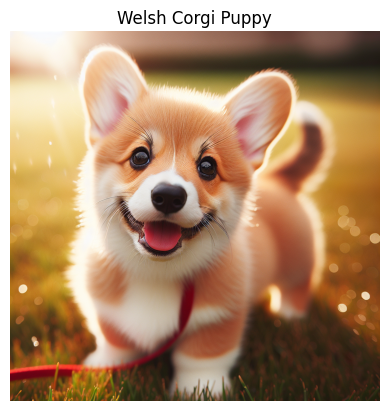

In [ ]:
# Example 7: Text-to-image

import openai
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Define your image prompt
PROMPT="a Welsh Corgi Pembroke puppy"
TITLE="Welsh Corgi Puppy"

# Get the secret from the environment
api_key = userdata.get('OPENAI_API_KEY')
client = openai.OpenAI(api_key=api_key)

# Generate a single image
response = client.images.generate(
    model="dall-e-3",
    prompt=PROMPT,
    size="1024x1024",
    quality="standard",
    n=1
)

# Get the image URL
image_url = response.data[0].url

# Fetch and display the image
img_response = requests.get(image_url)
img = Image.open(BytesIO(img_response.content))

# Save the image
img.save("dalle3_image.jpg", "JPEG")

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title(TITLE)
plt.show()


If the code is correct, you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image20A.png)

There is a degree of randomization in Text-to-Image programs so that each image generated is different.

### **Exercise 7: Text-to-Image**

In the next cell write the code to use the `dall-e-3` Text-to-Image program to generate a picture. You are free to generate any picture that you want. Don't forget to change the **image title** to match your subject.

### **NOTICE**

Test-to-Image programs have restrictions on the kinds of images that can be generate. If you try to generate an pornographic or another censored image type you will receive the following error message:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image21A.png)



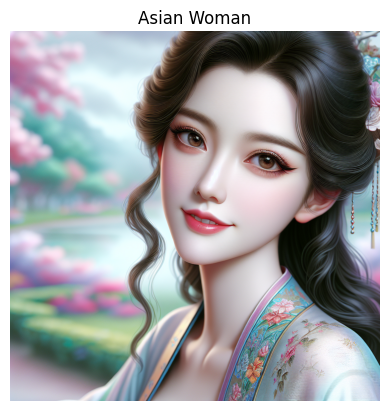

In [ ]:
# Insert your code for Exercise 7 here

import openai
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Define your image prompt
PROMPT="a beautiful Asian woman"
TITLE="Asian Woman"

# Get the secret from the environment
api_key = userdata.get('OPENAI_API_KEY')
client = openai.OpenAI(api_key=api_key)

# Generate a single image
response = client.images.generate(
    model="dall-e-3",
    prompt=PROMPT,
    size="1024x1024",
    quality="standard",
    n=1
)

# Get the image URL
image_url = response.data[0].url

# Fetch and display the image
img_response = requests.get(image_url)
img = Image.open(BytesIO(img_response.content))

# Save the image
img.save("dalle3_image.jpg", "JPEG")

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title(TITLE)
plt.show()


The output you see will depend upon your prompt. Make sure that the image title matches the subject matter of your image.

# Why DALL·E 3 Generates Different Images from the Same Prompt

DALL·E 3, like other generative AI models, can produce **varied outputs** even when the input prompt is identical. This behavior is intentional and rooted in how the model is designed.

## Key Reasons for Variation

### 1. **Stochastic Sampling**
- DALL·E 3 uses **randomness** during the image generation process.
- Even with the same prompt, the model samples from a distribution of possible outputs, leading to different results.

### 2. **Latent Space Diversity**
- The model operates in a **latent space** where many visual interpretations of a prompt can exist.
- For example, "a cat on a windowsill" could vary in breed, lighting, style, background, and pose.

### 3. **Prompt Interpretation**
- Natural language is inherently **ambiguous**.
- The model may emphasize different aspects of the prompt each time (e.g., focusing more on "windowsill" vs. "cat").

### 4. **Model Temperature Settings**
- Some platforms allow adjusting the **temperature** (a parameter controlling randomness).
- Higher temperature = more creative and varied outputs.

### 5. **Fine-Tuning and Updates**
- If the model has been updated or fine-tuned, even subtle changes can affect output consistency.

## Can You Get Consistent Results?

Yes, but with limitations:
- Use **prompt engineering** to be extremely specific.
- Some platforms allow setting a **seed value** to control randomness (though DALL·E 3 may not expose this directly).



### Example 8: Create Multiple Images

To illustrate the degree of variation between images generated by exactly the same prompt, the code in the cell below generates 3 images using the same prompt that was used in Example 7.

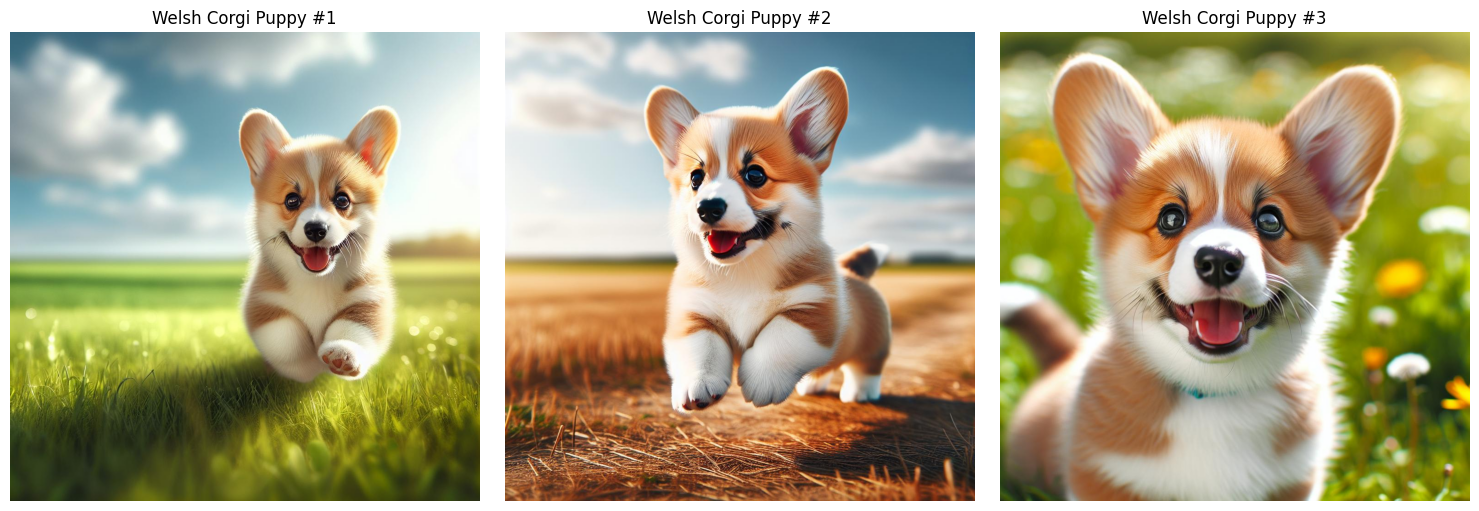

In [ ]:
# Example 8: Create multiple images

import openai
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Define your image prompt and title
PROMPT = PROMPT="a Welsh Corgi Pembroke puppy"
TITLE = "Welsh Corgi Puppy"

# Get the secret from the environment
api_key = userdata.get('OPENAI_API_KEY')
client = openai.OpenAI(api_key=api_key)

# Generate and save 3 images
for i in range(3):
    response = client.images.generate(
        model="dall-e-3",
        prompt=PROMPT,
        size="1024x1024",
        quality="standard",
        n=1
    )

    image_url = response.data[0].url
    img_response = requests.get(image_url)
    img = Image.open(BytesIO(img_response.content))
    img.save(f"dalle3_image_{i+1}.jpg", "JPEG")

# Display images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    img = Image.open(f"dalle3_image_{i+1}.jpg")
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{TITLE} #{i+1}")
plt.tight_layout()
plt.show()


If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_2_image22A.png)

### **Exercise 8: Create Multiple Images**

In the cell below write the code to create three images using the same prompt that you used above in **Exercise 8**.

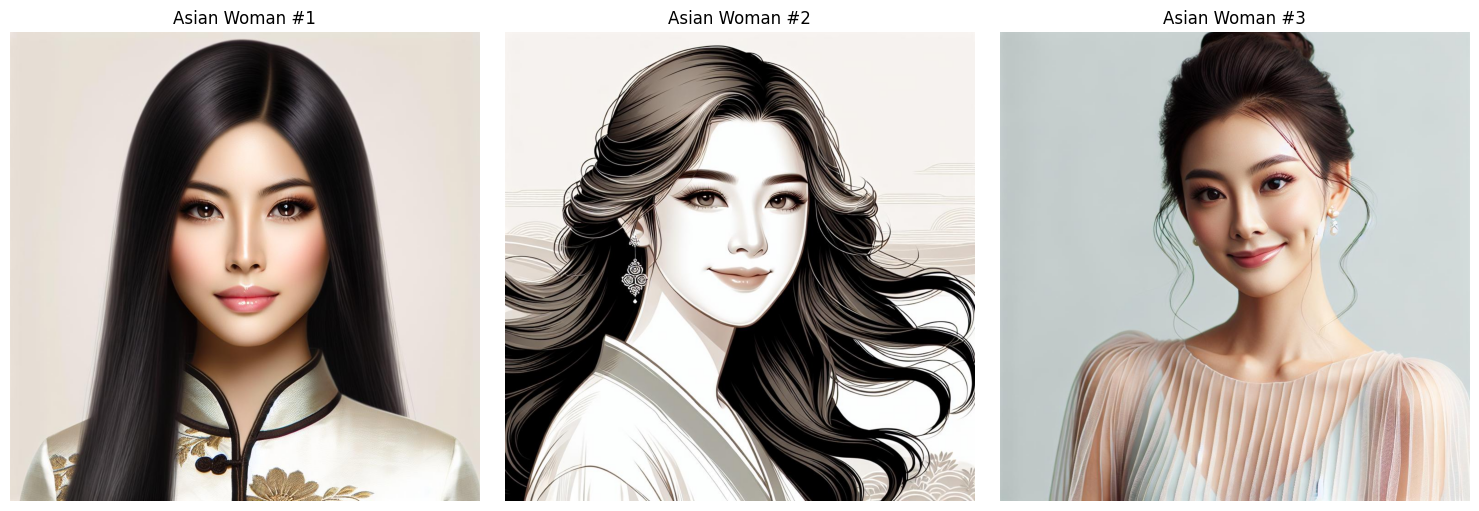

In [ ]:
# Insert your code for Exercise 8 here

import openai
import os
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Define your image prompt and title
PROMPT = PROMPT="a Beautiful Asian Woman"
TITLE = "Asian Woman"

# Get the secret from the environment
api_key = userdata.get('OPENAI_API_KEY')
client = openai.OpenAI(api_key=api_key)

# Generate and save 3 images
for i in range(3):
    response = client.images.generate(
        model="dall-e-3",
        prompt=PROMPT,
        size="1024x1024",
        quality="standard",
        n=1
    )

    image_url = response.data[0].url
    img_response = requests.get(image_url)
    img = Image.open(BytesIO(img_response.content))
    img.save(f"dalle3_image_{i+1}.jpg", "JPEG")

# Display images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    img = Image.open(f"dalle3_image_{i+1}.jpg")
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{TITLE} #{i+1}")
plt.tight_layout()
plt.show()


The output you see will depend upon your prompt. Make sure that the image title matches the subject matter of your image.

# **Lesson Turn-in**
When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as Copy of Class_04_2._lastname_.pdf where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**


##**Attention Is All You Need**

![__](https://upload.wikimedia.org/wikipedia/commons/8/8f/The-Transformer-model-architecture.png)

**"Attention Is All You Need"** is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, as the transformer approach has become the main architecture of large language models like those based on GPT. At the time, the focus of the research was on improving Seq2seq techniques for machine translation, but the authors go further in the paper, foreseeing the technique's potential for other tasks like question answering and what is now known as multimodal Generative AI.

The paper's title is a reference to the song "All You Need Is Love" by the Beatles. The name "Transformer" was picked because Jakob Uszkoreit, one of the paper's authors, liked the sound of that word.

An early design document was titled "Transformers: Iterative Self-Attention and Processing for Various Tasks", and included an illustration of six characters from the Transformers animated show. The team was named Team Transformer.

Some early examples that the team tried their Transformer architecture on included English-to-German translation, generating Wikipedia articles on "The Transformer", and parsing. These convinced the team that the Transformer is a general purpose language model, and not just good for translation.

As of 2024, the paper has been cited more than 140,000 times.

**Authors**

The authors of the paper are: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan Gomez, Lukasz Kaiser, and Illia Polosukhin. All eight authors were "equal contributors" to the paper; the listed order was randomized. The Wired article highlights the group's diversity:

Six of the eight authors were born outside the United States; the other two are children of two green-card-carrying Germans who were temporarily in California and a first-generation American whose family had fled persecution, respectively.

**Methods Discussed & Introduced**

The paper is most well known for the introduction of the Transformer architecture, which forms the underlying architecture for most forms of modern Large Language Models (LLMs). A key reason for why the architecture is preferred by most modern LLMs is the parallelizability of the architecture over its predecessors. This ensures that the operations necessary for training can be accelerated on a GPU allowing both faster training times and models of bigger sizes to be trained.

The following mechanisms were introduced by the paper as part of the development of the transformer architecture.

**Scaled dot-product Attention & Self-attention**

The use of the scaled dot-product attention and self-attention mechanism instead of an RNN or LSTM (which rely on recurrence instead) allow for better performance as described in the following paragraph.

Since the model relies on Query (Q), Key (K) and Value (V) matrices that come from the same source itself (i.e. the input sequence / context window), this eliminates the need for RNNs completely ensuring parallelizability for the architecture. This differs from the original form of the Attention mechanism introduced in 2014. Additionally, the paper also discusses the use of an additional scaling factor that was found to be most effective with respect to the dimension of the key vectors.

In the specific context of translation which the paper focused on, the Query and Key matrices are usually represented in embeddings corresponding to the source language while the Value matrix corresponds to the target language.

**Multi-head Attention**

In the self-attention mechanism, queries (Q), keys (K), and values (V) are dynamically generated for each input sequence (limited typically by the size of the context window), allowing the model to focus on different parts of the input sequence at different steps. Multi-head attention enhances this process by introducing multiple parallel attention heads. Each attention head learns different linear projections of the Q, K, and V matrices. This allows the model to capture different aspects of the relationships between words in the sequence simultaneously, rather than focusing on a single aspect.

By doing this, multi-head attention ensures that the input embeddings are updated from a more varied and diverse set of perspectives. After the attention outputs from all heads are calculated, they are concatenated and passed through a final linear transformation to generate the output.

**Positional Encoding**

Since the `Transformer model` is not a `seq2seq model` and does not rely on the sequence of the text in order to perform encoding and decoding, the paper relied on the use of sine and cosine wave functions to encode the position of the token into the embedding.

**Historical context**

For many years, sequence modelling and generation was done by using plain recurrent neural networks (RNNs). A well-cited early example was the Elman network (1990). In theory, the information from one token can propagate arbitrarily far down the sequence, but in practice the vanishing-gradient problem leaves the model's state at the end of a long sentence without precise, extractable information about preceding tokens.

A key breakthrough was LSTM (1995), a RNN which used various innovations to overcome the vanishing gradient problem, allowing efficient learning of long-sequence modelling. One key innovation was the use of an attention mechanism which used neurons that multiply the outputs of other neurons, so-called multiplicative units. Neural networks using multiplicative units were later called sigma-pi networks or higher-order networks. LSTM became the standard architecture for long sequence modelling until the 2017 publication of Transformers. However, LSTM still used sequential processing, like most other RNNs. Specifically, RNNs operate one token at a time from first to last; they cannot operate in parallel over all tokens in a sequence.

Modern Transformers overcome this problem, but unlike RNNs, they require computation time that is quadratic in the size of the context window. The linearly scaling fast weight controller (1992) learns to compute a weight matrix for further processing depending on the input. One of its two networks has "fast weights" or "dynamic links" (1981). A slow neural network learns by gradient descent to generate keys and values for computing the weight changes of the fast neural network which computes answers to queries. This was later shown to be equivalent to the unnormalized linear Transformer.